<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [22]:
#Importation de la librairie Pandas
import pandas as pd

In [2]:
#Importation de la librairie plotly express
import plotly.express  as px

In [3]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [23]:
#Importation du fichier web.xlsx
df_web = pd.read_excel("web.xlsx")
#Importation du fichier erp.xlsx
df_erp =pd.read_excel("erp.xlsx")
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel("liaison.xlsx")

c:\Users\leo morel\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
c:\Users\leo morel\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
c:\Users\leo morel\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements du fichiers csv</h3>
</div>

In [5]:
#Avant d'utiliser pandas pour le chargement du fichier, explorons la structure du fichier
#Pour cela utilisons l'instruction ci-dessous qui permet d'ouvrir un fichier texte
with open("caracteristiques_vins.csv", "rb") as f:
    file = f.read()
    
#Et affichons le:
print(file)

b"post_name;poids;R\xe9gion;Domaine;Appellation;Couleur;C\xe9page;Mill\xe9sime;Garde;Contenance;Degr\xe9 d'alcool;Temp\xe9rature d\xe9gustation;Alliance mets\r\npierre-jean-villa-saint-joseph-preface-2018;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Saint Joseph;Rouge;100% Syrah;2020;4-7 ans;75cl;13%;15\xb0C;Charcuterie, Lapin, Viande rouge, Volaille\r\npierre-jean-villa-saint-joseph-tilde-2017;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Saint Joseph;Rouge;100% Syrah;2019;6-8 ans;75cl;13%;15\xb0C;Charcuterie, Viande rouge, Volaille\r\npierre-jean-villa-croze-hermitage-accroche-coeur-2018;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Crozes-Hermitage;Rouge;100% Syrah;2020;3-5 ans;75cl;13%;15\xb0C;Viande rouge, Volaille\r\npierre-jean-villa-igp-gamine-2018;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Collines Rhodaniennes;Rouge;100% Syrah;2020;3-5 ans;75cl;13%;14\xb0C;Charcuterie, Viande rouge, Volaille\r\npierre-jean-villa-cote-rotie-carmina-2017;1.5 kg;Rh\xf4ne;Pierre Jean Villa;C\xf4te R\xf4tie;Rouge;100% Syrah;2019;10-20 ans;7

In [ ]:
#Vous avez dû constater que les champs sont séparées par des point-virgule

#tentons d'ouvrir le fichier avec pandas avec cet élément
df_caracteristiques = pd.read_csv("caracteristiques_vins.csv", sep=";")

Nous obtenons une erreur, elle est de type <code>UnicodeDecodeError</code><br>
Celle-ci semble être liée à l'encodage du fichier<br>
Utilisons la bibliothèque <code>chardet</code> pour tenter d'identifier l'encodage du fichier

In [6]:
#Importation de la bibilothèque 
#(à noter que c'est une mauvaise pratique d'importer une bibliothèque au milieu d'un programme)
#(celle-ci doit toujours figurer au début du script)
import chardet

Rendez-vous sur le lien ci-après pour identifier l'instruction dont vous aurez besoin:<br>
https://chardet.readthedocs.io/en/latest/usage.html#basic-usage

In [7]:
# Identification de l'encodage du fichier
with open("caracteristiques_vins.csv", 'rb') as f:
    encoding = chardet.detect(f.read()).get('encoding', 'utf-8')

print(encoding)

Windows-1252


In [8]:
#A présent que nous connaissons les séparateurs et l'encodage du fichier
#Utilisons Pandas pour charger le fichier
#Je vous laisse le soin de renseigner les champs manquants
nom_du_fichier = "caracteristiques_vins.csv"
type_de_separateur = ";"
encodage_du_fichier_csv = "Windows-1252"

df_caracteristiques = pd.read_csv(nom_du_fichier, sep=type_de_separateur, encoding=encodage_du_fichier_csv)

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [ ]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

In [ ]:
# Consulter le nombre de colonnes
print("le nombre de colonne est de {}".format(len(df_erp.columns)))
# La nature des données dans chacune des colonnes
print("la nature des données des colonnes sont")
print("{}".format(df_erp.dtypes))
# Le nombre de valeurs présentes dans chacune des colonnes
print("le nombre de valeurs présentes dans les colonnes sont de")
print("{}".format(len(df_erp.index)))

In [ ]:
#Afficher les 5 premières lignes de la table
df_erp.head()

In [ ]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
len(set(df_erp['product_id'])) != len(df_erp['product_id'])
df_liaison.loc[df_liaison.duplicated()
]

In [ ]:
# Afficher les valeurs distinctes de la colonne stock_status
colonne = set(df_erp['stock_status'])
print("les valeurs distinctes de la colonne sont",colonne)

# À quelle(s) autre(s) colonne(s) sont-elles liées ?
valeur= ("outofsotck","instock")
colonne_a_verif = df_erp[['onsale_web','price','product_id','stock_quantity']]

if valeur in colonne_a_verif :
    print("les valeurs {} de la colonne sotck status sont présentes dans les autres colonnes".format(valeur))
else :
    print(
        "les valeurs {} de la colonne sotck status n'appartiennent à aucune autres colonnes".format(valeur))

In [24]:
# Création d'une colonne "stock_status_2
# La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
# si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
df_erp["stock_status_2"] = df_erp["stock_quantity"].apply(
    lambda x: "outofstock" if pd.isnull(x) or x == 0 else "instock"
)
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,stock_status_2
0,3847,1,24.2,0,outofstock,outofstock
1,3849,1,34.3,0,outofstock,outofstock
2,3850,1,20.8,0,outofstock,outofstock
3,4032,1,14.1,0,outofstock,outofstock
4,4039,1,46.0,0,outofstock,outofstock


In [ ]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

In [ ]:
# Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
# True vaut 1 et False 0
# Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
colonne_stock_status = df_erp["stock_status"] == df_erp["stock_status_2"]

somme_true = sum(1 for valeur in colonne_stock_status if valeur)

print("la somme des valeurs trues est de {}".format(somme_true))
    

In [ ]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3

In [ ]:
#Corriger la ou les données incohérentes



<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [ ]:
###############
## LES PRIX  ##
###############

# Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
Prix = df_erp['price']
valeurs_vide_prix = df_erp["price"].isna().any()
valeurs_non_renseignés = df_erp['price'].empty
valeurs_négatif = df_erp['price'] < 0 

print("Il y a t'il des valeurs")
print("vides :",valeurs_vide_prix)
print("non renseignés :", valeurs_non_renseignés)
print("Nombre valeurs négatifs :{}".format(sum(valeurs_négatif)))
# Afficher le prix minimum de la colonne "price"
minimum_prix = df_erp["price"].min()
print("le prix minimm de la colonne price est {}".format(minimum_prix))
# Afficher le prix maximum de la colonne price
maximum_prix = df_erp["price"].max()
print("le prix maximun de la colonne est {}".format(maximum_prix))

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [ ]:
#######################
### stock_quantity  ###
#######################

# Vérification de la colonne stock quantity
# Afficher la quantité minimum de la colonne "stock_quantity"

print("la quantité minimale est {}".format(df_erp["stock_quantity"].min()))

# Afficher la quantité maximum de la colonne "stock_quantity"

print("la quantité maximale est {}".format(df_erp['stock_quantity'].max()))

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [ ]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
print("les différentes valeurs de la colonne sont :")
print(set(df_erp['onsale_web']))
    #elles représentes si c'est une vente en ligne 1=oui et 0=non

In [ ]:
#Quelles sont les colonnes à conserver selon vous?

#toutes les colonne sauf la colonnes stock_status et stock_status_2 


In [25]:
#Supprimer les colonnes comportant le libellé "stock_status"
df_erp = df_erp.drop(columns=['stock_status','stock_status_2'])
#Cette colonne est redondante avec la colonne "stock_quantity". Dans notre projet cette information n'est pas utile.
df_erp.head()

,product_id,onsale_web,price,stock_quantity
0,3847,1,24.2,0
1,3849,1,34.3,0
2,3850,1,20.8,0
3,4032,1,14.1,0
4,4039,1,46.0,0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [ ]:
#Dimension du dataset
print("les dimensions du dataset sont :",(df_web.shape))

#Nombre d'observations
print("le nombre d'observations sont de : ",(len(df_web)))

#Nombre de caractéristiques
print("le nombre de caractéristique sont de ",df_web.columns.size) #nombre de colonnes de df_web

In [ ]:
# Consulter le nombre de colonnes
print("le nombre de colonne est de",df_web.columns.size)

# La nature des données dans chacune des colonnes
print(df_web.dtypes)

# Le nombre de valeurs présentes dans chacune des colonnes
print("Le nombre de valeurs dans les colonne sont ",len(df_web.index))

In [42]:
# Si vous avez défini des colonnes à supprimer, effectuer l'opération
colonne_gardés = ["sku","total_sales","post_date","post_name"]
colonne_supprimer = [colonne for colonne in df_web if colonne not in colonne_gardés]
df_web.drop(columns=colonne_supprimer, inplace=True)
df_web.head(0)

,sku,total_sales,post_date,post_name


In [27]:
# Visualisation des valeurs de la colonne sku
print(df_web['sku'].head(10))

# Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
valeurs_differentes_sku = df_web['sku'].loc[df_web['sku'].str.len()>5]
print("\n","Les valeurs ayant plus de 5 caractères sont : ")
print("\n",valeurs_differentes_sku)

0    bon-cadeau-25-euros
1                  15298
2                  15296
3                  15300
4                  19814
5                  19815
6                  15303
7                  14975
8                  16042
9                  14980
Name: sku, dtype: object

 Les valeurs ayant plus de 5 caractères sont : 

 0       bon-cadeau-25-euros
797                 13127-1
1209    bon-cadeau-25-euros
1511                13127-1
Name: sku, dtype: object


In [28]:
# Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
valeurs_differentes_sku = df_web['sku'].loc[df_web['sku'].str.len()>5]
print(valeurs_differentes_sku)

0       bon-cadeau-25-euros
797                 13127-1
1209    bon-cadeau-25-euros
1511                13127-1
Name: sku, dtype: object


In [43]:
# Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre

#on peut aperçevoir que parmi les valeurs  identifié qu'on peut remplacer "13127-1" en "13127"
df_web.loc[797,"sku"]="13127"
df_web.loc[1511,"sku"]="13127"

#pour les valeurs ="bon cadeau" qui ne coresponde pas a la codification il faut les supprimer car on ne peut pas savoir les codes artcile 
df_web.drop(index=[0,1209],inplace=True)
#changer en tête colonne "sku" pour merge
df_web = df_web.rename(columns={'sku': 'id_web'})

In [39]:
df_web.head()

,sku,total_sales,post_date,post_name
1,15298,6.0,2018-02-08 12:58:52,pierre-jean-villa-saint-joseph-preface-2018
2,15296,0.0,2018-02-08 13:49:41,pierre-jean-villa-saint-joseph-tilde-2017
3,15300,0.0,2018-02-08 14:08:36,pierre-jean-villa-croze-hermitage-accroche-coe...
4,19814,3.0,2018-02-09 14:01:05,pierre-jean-villa-igp-gamine-2018
5,19815,0.0,2018-02-12 09:04:37,pierre-jean-villa-cote-rotie-carmina-2017


In [44]:
# La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?

if df_web["id_web"].duplicated().any():
    print("Il y a des doublons.")
else:
    print("Il n'y a pas de doublons.")

Il y a des doublons.


In [46]:
df_web.loc[df_web['id_web'].duplicated()]

,id_web,total_sales,post_date,post_name
179,NaN,NaN,NaT,NaN
227,NaN,NaN,NaT,NaN
230,NaN,NaN,NaT,NaN
231,NaN,NaN,NaT,NaN
233,NaN,NaN,NaT,NaN
237,NaN,NaN,NaT,NaN
283,NaN,NaN,NaT,NaN
309,NaN,NaN,NaT,NaN
310,NaN,NaN,NaT,NaN
311,NaN,NaN,NaT,NaN


In [55]:
# Identifier les lignes sans code article
df_web.loc[df_web['id_web'].isnull()]

,id_web,total_sales,post_date,post_name
178,NaN,NaN,NaT,NaN
179,NaN,NaN,NaT,NaN
227,NaN,NaN,NaT,NaN
230,NaN,NaN,NaT,NaN
231,NaN,NaN,NaT,NaN
233,NaN,NaN,NaT,NaN
237,NaN,NaN,NaT,NaN
283,NaN,NaN,NaT,NaN
309,NaN,NaN,NaT,NaN
310,NaN,NaN,NaT,NaN


In [56]:
# Les lignes sans code article semble être toutes non renseignés
# Pour s'en assurer réaliser les étapes suivantes:
# 1 - Créer un dataframe avec uniquement les lignes sans code article
df_vides = df_web.loc[df_web['id_web'].isnull()]
# 2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
df_vides.info()
# 3 - Que constatez-vous?
print("\n","Tout le dataframe est vide")

#on peut donc supprimer les valeurs vides du df "df_web"
df_web.dropna(thresh=4,inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 178 to 796
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_web       0 non-null      object        
 1   total_sales  2 non-null      float64       
 2   post_date    2 non-null      datetime64[ns]
 3   post_name    2 non-null      object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.3+ KB

 Tout le dataframe est vide


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [ ]:
#Dimension du dataset
print("les domensions du dataset sont",df_liaison.shape)
#Nombre d'observations
print("Le nombre d'observations est de",len(df_liaison.index))
#Nombre de caractéristiques
print("Le nombre de caractéristique est de  : ",len(df_liaison.columns))

In [ ]:
#Consulter le nombre de colonnes
print("Le nombre de colonne est de :",len(df_liaison.columns))
#La nature des données dans chacune des colonnes
print("Le type des données de chaque colonnes sont :")
print(df_liaison.dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
print(len(df_liaison.index))

In [61]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
if df_liaison.duplicated().any() : 
   print("il ya  des doublons")
else : 
   print("il n'y a pas de doublons")


il n'y a pas de doublons


In [62]:
# Les valeurs de la colonne "id_web" sont-elles toutes uniques?

if df_liaison['product_id'].duplicated().any():
   print("il y a des doublons")
else :
   print("toutes les valeurs sont uniques")

toutes les valeurs sont uniques


In [63]:
# Avons-nous des articles sans correspondances?
if df_liaison['id_web'].isnull().any():
   print("il y a des articles sans correspondances\n",df_liaison.loc[df_liaison['id_web'].isnull()])
   df_liaison.dropna(thresh=2,inplace=True)
else :
   print("tous les articles ont des correspondances")

il y a des articles sans correspondances
      product_id id_web
19         4055    NaN
49         4090    NaN
50         4092    NaN
119        4195    NaN
131        4209    NaN
151        4233    NaN
184        4278    NaN
185        4279    NaN
234        4565    NaN
238        4577    NaN
239        4578    NaN
242        4594    NaN
246        4599    NaN
292        4659    NaN
318        4692    NaN
319        4693    NaN
320        4697    NaN
321        4698    NaN
322        4702    NaN
340        4721    NaN
352        4738    NaN
356        4744    NaN
384        4798    NaN
396        4874    NaN
416        4911    NaN
449        4973    NaN
469        5017    NaN
472        5020    NaN
486        5070    NaN
487        5075    NaN
541        5560    NaN
547        5569    NaN
618        5805    NaN
621        5808    NaN
659        5952    NaN
696        6125    NaN
724        6324    NaN
726        6327    NaN
739        6594    NaN
761        6821    NaN
762        6824

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.4 - Analyse exploratoire du fichier caracteristiques_vins.xlsx</h3>
</div>

In [ ]:
# Dimension du dataset
print(df_caracteristiques.shape)
# Nombre d'observations
print(len(df_caracteristiques.index))
# Nombre de caractéristiques
print(len(df_caracteristiques.columns))

In [ ]:
#Consulter le nombre de colonnes
print(len(df_caracteristiques.index))
#La nature des données dans chacune des colonnes
print(df_caracteristiques.dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
print(len(df_caracteristiques))


In [ ]:
#Affichage des 5 premières lignes du dataset
df_caracteristiques.head()


In [64]:
# Quels sont les produits avec des informations manquantes?
missing_values_A = df_caracteristiques[df_caracteristiques.isnull().any(axis=1)]
print("les produits qui ont des informations manquantes sont :\n ")
print(missing_values_A)

les produits qui ont des informations manquantes sont :
 
                                             post_name   poids  \
60                     gosset-champagne-grande-reserve  1.5 kg   
62                         champagne-gosset-grand-rose  1.5 kg   
63                    champagne-mailly-gc-brut-reserve  1.5 kg   
64          champagne-mailly-grand-cru-extra-brut-2012  1.5 kg   
65                champagne-mailly-grand-cru-brut-rose  1.5 kg   
66   champagne-mailly-grand-cru-intemporelle-rose-2009  1.5 kg   
67        champagne-mailly-grand-cru-intemporelle-2010  1.5 kg   
116        domaine-montrose-cotes-de-thongue-rose-2019  1.5 kg   
125                       frissant-chenin-pierres-2018  1.5 kg   
126        xavier-frissant-touraine-roses-du-clos-2018  1.5 kg   
127  xavier-frissant-touraine-amboise-m-de-la-touch...  1.5 kg   
128            xavier-frissant-touraine-sauvignon-2019  1.5 kg   
129                  pierre-martin-sancerre-rouge-2017  1.5 kg   
130        pierre-

In [65]:
# Est-il possible de corriger les données manquantes?

print("il n'est pas possible de corriger les données, il manque trop d'information")
#supressions des lignes vides
print("il convient de supprimer les valeurs ou il nous manque trop d'information")
df_caracteristiques.dropna(thresh=13,inplace=True)

il n'est pas possible de corriger les données, il manque trop d'information
il convient de supprimer les valeurs ou il nous manque trop d'information


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [66]:
# Fusion des fichiers df_erp et df_liaison
df_merge = pd.merge(df_erp, df_liaison, on="product_id")
len(df_merge)

734

In [67]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
df_merge.loc[df_merge['id_web'].isnull()]

,product_id,onsale_web,price,stock_quantity,id_web


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [68]:
# Fusionnez les datasets df_merge et df_web
df_merge = pd.merge(df_merge, df_web, on="id_web")
len(df_merge)

1424

In [69]:
#Avons-nous des lignes sans correspondances?
df_merge.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.3 - Jonction du fichier df_merge et df_caracteristiques</h3>
</div>

In [70]:
#Fusion de la table df_merge et df_caracteristiques 
df_merge = pd.merge(df_merge, df_caracteristiques, on='post_name')
len(df_merge)

986

In [71]:
#vérification si il y a des duplicata
df_merge.duplicated().any()

df_merge.drop_duplicates(inplace=True)

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

<Axes: >

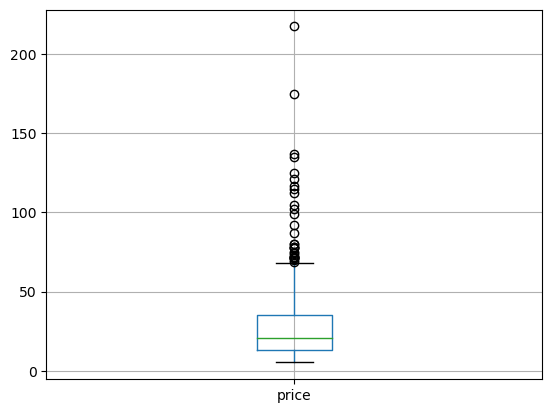

In [72]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
df_merge.boxplot(column="price")

In [91]:
print(prix_max)

217.5


In [93]:
#Autre méthode avec plotly express
fig = px.box(df_merge, y="price")
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [74]:
#Calculer la moyenne du prix
moyenne_prix = df_merge['price'].mean()
print("la moyenne de la colonne prix est : ",moyenne_prix)

#Calculer l'écart-type du prix
écart_type = df_merge['price'].std()

#Calculer le Z-score
valeur_x=df_merge['price']
df_merge['z_score'] =(valeur_x - moyenne_prix)/écart_type
print(df_merge['z_score'])
print("le moyenne de z score est de : ",df_merge['z_score'].mean())


la moyenne de la colonne prix est :  28.372413793103444
0     -0.173113
2      0.245935
4     -0.314178
6     -0.592160
8      0.731366
10     0.245935
12     0.179551
14     0.117316
16     1.312224
18     0.590301
20     2.142021
22    -0.417903
24    -0.231199
26    -0.376413
28    -0.272689
30    -0.857696
32     0.221041
34     0.660833
36     1.793506
38    -0.650246
40    -0.816206
42    -0.816206
44    -0.816206
46    -0.683438
48    -0.683438
50    -0.575564
52    -0.368115
54    -0.264391
56    -0.488436
58    -0.206305
60     0.200296
62     0.150508
64     2.050744
66    -0.650246
68    -0.567267
70    -0.594235
72    -0.227050
74     0.648386
76     0.357957
78     0.440937
80    -0.471840
82    -0.214603
84    -0.388860
86    -0.496734
88    -0.579713
90    -0.608756
92    -0.654395
94    -0.231199
96    -0.646097
98    -0.260242
100   -0.646097
102   -0.521628
104   -0.521628
106   -0.500883
108   -0.500883
110   -0.774716
112   -0.895036
114   -0.654395
116    0.274978


In [75]:
#Quel est le seuil prix dont z-score est supérieur à 3?
resultats = min(df_merge['price'].loc[df_merge['z_score']>3])
print("le seuil pour que le z_score soit supérieur à 3 est : ",resultats)

le seuil pour que le z_score soit supérieur à 3 est :  102.3


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [76]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df_merge.describe()

,product_id,onsale_web,price,stock_quantity,total_sales,post_date,Millésime,z_score
count,493.000000,493.0,493.000000,493.000000,493.000000,493,493.000000,4.930000e+02
mean,5023.454361,1.0,28.372414,32.713996,4.245436,2018-08-22 19:49:36.407707904,2018.032454,1.729516e-16
min,3847.000000,1.0,5.200000,0.000000,0.000000,2018-02-08 12:58:52,2003.000000,-9.614202e-01
25%,4240.000000,1.0,13.100000,5.000000,0.000000,2018-02-20 09:49:21,2017.000000,-6.336503e-01
50%,4860.000000,1.0,20.600000,17.000000,1.000000,2018-05-03 12:46:23,2019.000000,-3.224763e-01
75%,5715.000000,1.0,35.200000,39.000000,5.000000,2019-01-31 15:13:51,2020.000000,2.832756e-01
max,7025.000000,1.0,217.500000,363.000000,62.000000,2020-05-02 15:00:54,2021.000000,7.846877e+00
std,808.716843,0.0,24.102276,47.507224,7.620749,NaN,2.357948,1.000000e+00


In [77]:
#Définissez un seuil pour les articles "outliers" en prix

#pour definir le seuil on peut utiliser la méthode du z-score quand il est au dessus de 2 ou 3 
resultats = min(df_merge['price'].loc[df_merge['z_score']>2])
print("le seuil pour que le z_score soit supérieur à 3 est : ",resultats)

#l'autre méthode que l'on peut voir dans la boite à moustache est "l'upper fence" soit l'ecart interquatile au dessus du Q3
Q3 = df_merge['price'].quantile(0.75)
Q1 = df_merge['price'].quantile(0.25)
IQR = Q3 - Q1
# Calculer l'upper fence
upper_fence = Q3 + 1.5 * IQR
print("L'upper fence montrant le seuil des prix des outliers est : ",upper_fence)

print("si on fait la moyenne des 2 résultat cela nous donne :  {}".format(round((resultats+upper_fence)/2)))

#on peut aussi le voir via la boite à moustache, notemment avec celle de plotly dans lequel on peut voir les possible 'outliers'

le seuil pour que le z_score soit supérieur à 3 est :  77.4
L'upper fence montrant le seuil des prix des outliers est :  68.35000000000001
si on fait la moyenne des 2 résultat cela nous donne :  73


In [78]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
codes_outliers = df_merge[df_merge['price'] > upper_fence]['product_id']
nombre_codes_outliers = codes_outliers.nunique() 
print(nombre_codes_outliers)

nombre_total_ligne = df_merge['product_id'].nunique()
print("la proportion d'outliers est de ",round(nombre_codes_outliers/nombre_total_ligne*100),"%")

31
la proportion d'outliers est de  6 %


In [83]:
# Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?

# étant donner que l'on vend des spiritueux, les écart de prix peuvent être très inégale, suivant la renommer de la marque, la qualité, ect...

# appellation et prix des artciles au dessus de l'upper fence
appelation_upper_fence = df_merge[df_merge["price"]> upper_fence][['Appellation','price']]
print("superieur a l'upper fence :")
print(appelation_upper_fence.count())

# appellation et prix des artciles au dessus du z_score 3
z_scrore_3 = min(df_merge[["Appellation","price"]].loc[df_merge["z_score"] > 2])
superieur_z_score = df_merge[df_merge['price']> resultats][["Appellation","price"]]
print("superieur à 3 au z_score :")
print(superieur_z_score.count())

superieur a l'upper fence :
Appellation    31
price          31
dtype: int64
superieur à 3 au z_score :
Appellation    19
price          19
dtype: int64


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA et des quantités vendues</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [84]:
##############################
# Calculer le CA su site web #
##############################

#Créez une colonne calculant le CA par article
df_merge['ca_par_article'] = df_merge['price']*df_merge['total_sales']

#Calculez la somme de la colonne "ca_par_article"
somme_ca_par_article =sum(df_merge['ca_par_article'])
#Ce résultat correspond au chiffre d'affaire du site web
print("le résultat du CA site web est de :")
print(round(somme_ca_par_article))

le résultat du CA site web est de :
41804


In [ ]:
###############################
# Palmares des articles en CA #
###############################

# Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
liste_decroissante_ca = df_merge.sort_values(ascending=False,by=["ca_par_article"]) 
# Réinitialiser l'index du dataset par un reset_index
liste_decroissante_ca.reset_index(inplace=True)
# Afficher les 20 premier articles en CA
liste_decroissante_ca = liste_decroissante_ca.head(20)
print(liste_decroissante_ca[['product_id','ca_par_article']])

# Graphique en barre des 20 premiers articles avec plotly express
fig = px.bar(
    liste_decroissante_ca,
    y="ca_par_article",
    labels={"ca_par_article": "CA par article", "_index": "Articles"},
    title="Palamares des article en CA",
)
fig.show()

# graphique par domaine
liste_decroissante_ca = liste_decroissante_ca.sort_values(by='ca_par_article',ascending=False)
liste_decroissante_ca.reset_index(inplace=True)
fig = px.bar(liste_decroissante_ca,
             y="ca_par_article",
             x="Domaine",
             labels={"ca_par_article","CA"},
             title="Palmares du CA par domaine")
fig.show()


# graphique du CA par Region

liste_decroissante_ca = liste_decroissante_ca.sort_values(by='ca_par_article',ascending=False)
fig = px.pie(liste_decroissante_ca,
             values="ca_par_article",
             names="Région",
             labels={"ca_par_article","CA"},
             title="Repartition CA par Région")
fig.update_traces(textposition="inside", textinfo="label")

fig.show()

In [85]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_merge["part_CA"] = df_merge["ca_par_article"].apply(lambda x: x / df_merge["ca_par_article"].sum())

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge['somme_cumulative'] = df_merge['part_CA'].cumsum()

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
nombre_articles = df_merge.loc[df_merge['somme_cumulative']<=0.8]
len(nombre_articles)
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
operation = round(len(nombre_articles)/len(df_erp['product_id']),2)
print("la porportion des artciles qui font 80 % du CA est de  ",operation)


la porportion des artciles qui font 80 % du CA est de   0.4


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [89]:
###############################
# Palmares des articles en quantité #
###############################

# Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
liste_decroissante_quantité = df_merge.sort_values(ascending=False,by='total_sales')
# Réinitialiser l'index du dataset par un reset_index
liste_decroissante_quantité.reset_index(inplace=True)
# Afficher les 20 premier articles en quantité
liste_decroissante_quantité = liste_decroissante_quantité.head(20)
print(liste_decroissante_quantité[['product_id',"stock_quantity"]])

# Graphique en barre des 20 premiers articles avec plotly express
fig = px.bar(liste_decroissante_quantité, y='total_sales',
             labels={"total_sales" :"Ventes Total","_index":"Articles"},
             title="Palamares des article en quantité"
             )
fig.show()


liste_decroissante_ca = liste_decroissante_quantité.sort_values(
    by="total_sales", ascending=False
)
liste_decroissante_ca.reset_index(inplace=True)
fig = px.bar(
    liste_decroissante_ca,
    y="total_sales",
    x="Domaine",
    labels={"ca_par_article", "CA"},
    title="Palmares du CA par domaine",
)
fig.show()


liste_decroissante_quantité = liste_decroissante_quantité.sort_values(
    by="total_sales", ascending=False
)
fig = px.pie(
    liste_decroissante_quantité,
    values="total_sales",
    names="Région",
    labels={"ca_par_article", "CA"},
    title="Repartition CA par Région",
)
fig.update_traces(textposition="inside", textinfo="label")

fig.show()

    product_id  stock_quantity
0         4068             157
1         4200             190
2         4172             167
3         4187              90
4         6206             120
5         6047              46
6         6207             363
7         4891               0
8         4153               0
9         4870               0
10        4250              14
11        4142               8
12        4861             284
13        4965             203
14        4918               0
15        5778              36
16        4053              16
17        4596               0
18        5519              35
19        4876               4


In [ ]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
df_merge["part_quantité"] = df_merge["stock_quantity"].apply(lambda x: x / df_merge["stock_quantity"].sum())
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge['somme_cumulative_quantity'] = df_merge['part_quantité'].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
nombre_articles = len(df_merge.loc[df_merge['somme_cumulative_quantity']<=0.8])
print(nombre_articles)
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
operation = round(nombre_articles/len(df_web['id_web']),2)
print("la porportion des artciles qui font 80 % du CA est de  ",operation)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [ ]:
#Mettre le dataset df_merge sur un fichier Excel
df_merge.to_excel("fichier.xlsx")
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Autre analyse du prix</h3>
</div>

In [171]:
fig = px.box(df_merge, y="price")
fig.show()

vin_plus_cher = df_merge.groupby(by=["Couleur"])["price"].mean()
fig.show()

fig = px.bar(vin_plus_cher,y='price',color="price",
             title="Moyenne des prix par couleur")
fig.show()

print(vin_plus_cher)

Couleur
Blanc    27.690865
Rosé     10.572222
Rouge    30.103371
Name: price, dtype: float64
